In [ ]:
# fetch chess game data
import requests

def fetch_game_data(game_id, token):
    url = f'https://lichess.org/game/export/{game_id}'
    headers = {'Authorization': f'Bearer {token}'}  # Replace with your Lichess API token
    response = requests.get(url, headers=headers)
    return response.text

In [188]:
import re
from datetime import datetime, timedelta, timezone
import pandas as pd

def hhmmss_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

def extract_moves(moves_string):
    move_pattern = re.compile(r"\d+\.+\s[a-h1-8NBRQKx=+#]+\s\{\s\[%clk\s\d+:\d+:\d+\]\s\}")
    matches = move_pattern.findall(moves_string)

    chess_moves = []
    # now loop through the matches and add to list of objects
    for match in matches:
        move_index_string = re.search(r"\d+\.+", match).group() # e.g 1. for white, 1... for black
        move_index = int(move_index_string.split(".")[0])
        move = re.search(r"\s[a-h1-8NBRQKx=+#]+\s", match).group().strip()
        time_left = re.search(r"\d+:\d+:\d+", match).group()

        entry = {
            "move_index": move_index,
            "player": "white" if move_index_string.count(".") == 1 else "black", # if there's two .. after . t
            "move": move,
            "time_left_secs": hhmmss_to_seconds(time_left),
        }
        chess_moves.append(entry)
        
    return chess_moves

# The move string is provided from lichess api
move_string = "1. d4 { [%clk 0:10:00] } 1... d5 { [%clk 0:10:00] } 2. c4 { [%clk 0:09:55] } 2... e6 { [%clk 0:09:50] } 3. Nc3 { [%clk 0:09:51] } 3... Nc6 { [%clk 0:09:38] } 4. Bf4 { [%clk 0:09:47] } 4... Nf6 { [%clk 0:09:22] } 5. Nf3 { [%clk 0:09:44] } 5... Bb4 { [%clk 0:09:18] } 6. cxd5 { [%clk 0:09:37] } 6... exd5 { [%clk 0:09:15] } 7. Qb3 { [%clk 0:09:31] } 7... Bg4 { [%clk 0:09:02] } 8. a3 { [%clk 0:09:11] } 8... Bxf3 { [%clk 0:08:45] } 9. exf3 { [%clk 0:09:04] } 9... Nxd4 { [%clk 0:08:40] } 10. Qa4+ { [%clk 0:08:44] } 10... Qd7 { [%clk 0:08:16] } 11. Qxd7+ { [%clk 0:08:37] } 11... Nxd7 { [%clk 0:08:15] } 12. axb4 { [%clk 0:08:36] } 12... Nc2+ { [%clk 0:08:13] } 13. Kd2 { [%clk 0:08:32] } 13... Nxa1 { [%clk 0:08:11] } 14. Nxd5 { [%clk 0:08:25] } 14... O-O { [%clk 0:07:50] } 15. Bc4 { [%clk 0:08:22] } 15... c6 { [%clk 0:07:31] } 16. Ne7+ { [%clk 0:08:12] } 16... Kh8 { [%clk 0:07:25] } 17. Rxa1 { [%clk 0:08:11] } 17... Nb6 { [%clk 0:07:20] } 18. Kc3 { [%clk 0:08:09] } 18... Rfe8 { [%clk 0:06:40] } 19. Nf5 { [%clk 0:07:57] } 19... Nd5+ { [%clk 0:06:17] } 20. Bxd5 { [%clk 0:07:53] } 20... cxd5 { [%clk 0:06:16] } 21. Kd4 { [%clk 0:07:43] } 21... b6 { [%clk 0:06:06] } 22. b3 { [%clk 0:07:26] } 22... g6 { [%clk 0:06:03] } 23. Nd6 { [%clk 0:07:23] } 23... Re7 { [%clk 0:05:52] } 24. Kxd5 { [%clk 0:07:15] } 24... Kg7 { [%clk 0:05:23] } 25. Rc1 { [%clk 0:06:38] } 25... Rd7 { [%clk 0:05:21] } 26. Re1 { [%clk 0:06:27] } 26... h6 { [%clk 0:05:09] } 27. g4 { [%clk 0:06:26] } 27... g5 { [%clk 0:05:07] } 28. Bg3 { [%clk 0:06:23] } 28... Rad8 { [%clk 0:04:59] } 29. b5 { [%clk 0:06:19] } 29... Rc7 { [%clk 0:04:45] } 30. b4 { [%clk 0:05:46] } 30... Rc3 { [%clk 0:04:37] } 31. Re3 { [%clk 0:05:40] } 31... Rc2 { [%clk 0:04:28] } 32. f4 { [%clk 0:05:37] } 32... Rd2+ { [%clk 0:04:26] } 33. Ke4 { [%clk 0:05:27] } 33... R8xd6 { [%clk 0:04:25] } 34. fxg5 { [%clk 0:05:24] } 34... Re6+ { [%clk 0:04:21] } 35. Kf3 { [%clk 0:05:23] } 35... Rxe3+ { [%clk 0:04:10] } 36. fxe3 { [%clk 0:05:22] } 36... hxg5 { [%clk 0:04:07] } 37. Be5+ { [%clk 0:05:20] } 37... Kg6 { [%clk 0:04:04] } 38. Ke4 { [%clk 0:05:14] } 38... Rg2 { [%clk 0:03:57] } 39. h3 { [%clk 0:05:12] } 39... Rc2 { [%clk 0:03:48] } 40. Bb8 { [%clk 0:05:11] } 40... Rc4+ { [%clk 0:03:45] } 41. Kd5 { [%clk 0:05:09] } 41... Rxb4 { [%clk 0:03:41] } 42. Kc6 { [%clk 0:05:07] } 42... Rb3 { [%clk 0:03:39] } 43. e4 { [%clk 0:05:06] } 43... Rxh3 { [%clk 0:03:35] } 44. Bxa7 { [%clk 0:05:04] } 44... Rh4 { [%clk 0:03:31] } 45. Bxb6 { [%clk 0:05:01] } 45... Rxg4 { [%clk 0:03:29] } 46. Bc5 { [%clk 0:05:00] } 46... Rxe4 { [%clk 0:03:27] } 47. b6 { [%clk 0:04:59] } 47... Re6+ { [%clk 0:03:26] } 48. Kc7 { [%clk 0:04:58] } 48... Re8 { [%clk 0:03:15] } 49. b7 { [%clk 0:04:57] } 49... g4 { [%clk 0:03:08] } 50. b8=Q { [%clk 0:04:55] } 50... Rxb8 { [%clk 0:03:04] } 51. Kxb8 { [%clk 0:04:55] } 51... f5 { [%clk 0:03:03] } 52. Bd6 { [%clk 0:04:52] } 52... Kg5 { [%clk 0:03:02] } 53. Kb7 { [%clk 0:04:51] } 53... f4 { [%clk 0:03:00] }"
chess_moves = extract_moves(move_string)
chess_moves

chess_moves_df = pd.DataFrame(chess_moves)
chess_moves_df

,move_index,player,move,time_left_secs
0,1,white,d4,600
1,1,black,d5,600
2,2,white,c4,595
3,2,black,e6,590
4,3,white,Nc3,591
...,...,...,...,...
100,51,black,f5,183
101,52,white,Bd6,292
102,52,black,Kg5,182
103,53,white,Kb7,291


In [189]:
# both players have a 10min clock but things are happening simultaneously so we have to calculate things chronologically
game_length_seconds = 600
# game start value is provided by lichess api
game_start_utc = datetime.strptime("2024.06.06 23:07:21", "%Y.%m.%d %H:%M:%S").replace(tzinfo=timezone.utc)
game_start_timestamp = int(game_start_utc.timestamp())
game_start_timestamp

# calculate the cummulative time elapsed after
chess_moves_df["total_time_spent"] = 0

# first get how long each move takes
for index, row in chess_moves_df.iterrows():
    last_move = chess_moves_df[(chess_moves_df["player"] == row["player"]) & (chess_moves_df["move_index"] == row["move_index"] - 1)]
    if last_move.empty:
        continue
    chess_moves_df.at[index, "total_time_spent"] = last_move["time_left_secs"] - row["time_left_secs"]

# then calculate the cummulative time spent
chess_moves_df["game_time_spent"] = chess_moves_df["total_time_spent"].cumsum()
chess_moves_df["timestamp_ms"] = (game_start_timestamp + chess_moves_df["game_time_spent"]) * 1000
chess_moves_df

,move_index,player,move,time_left_secs,total_time_spent,game_time_spent,timestamp_ms
0,1,white,d4,600,0,0,1717715241000
1,1,black,d5,600,0,0,1717715241000
2,2,white,c4,595,5,5,1717715246000
3,2,black,e6,590,10,15,1717715256000
4,3,white,Nc3,591,4,19,1717715260000
...,...,...,...,...,...,...,...
100,51,black,f5,183,1,682,1717715923000
101,52,white,Bd6,292,3,685,1717715926000
102,52,black,Kg5,182,1,686,1717715927000
103,53,white,Kb7,291,1,687,1717715928000


In [190]:
chess_moves_white = chess_moves_df[chess_moves_df["player"] == "white"]
chess_moves_black = chess_moves_df[chess_moves_df["player"] == "black"]
chess_moves_white


,move_index,player,move,time_left_secs,total_time_spent,game_time_spent,timestamp_ms
0,1,white,d4,600,0,0,1717715241000
2,2,white,c4,595,5,5,1717715246000
4,3,white,Nc3,591,4,19,1717715260000
6,4,white,Bf4,587,4,35,1717715276000
8,5,white,Nf3,584,3,54,1717715295000
10,6,white,cxd5,577,7,65,1717715306000
12,7,white,Qb3,571,6,74,1717715315000
14,8,white,a3,551,20,107,1717715348000
16,9,white,exf3,544,7,131,1717715372000
18,10,white,Qa4+,524,20,156,1717715397000


In [191]:
# match chess move timestamps to the original EEG data

# In the chess example - david is playing as white & these are the timestamps corresponding to his moves. 
game_eeg_data = pd.read_csv('/Users/oreogundipe/lab/neuroscripts/explorer_datasets/chess_games/GAME2_DEREK_vs_DAVID/David/fusionDataExport_1717715269/rawBrainwaves_1717715269.csv')
game_eeg_data.drop(columns=['index'], inplace=True)
game_eeg_data

chess_moves_white = chess_moves_df[chess_moves_df["player"] == "white"]

# loop through and include, the move as the event_id
game_eeg_data["move"] = None
game_move_index = 0

#  assign the moves to eeg data 
for i, row in game_eeg_data.iterrows():
    if row['unixTimestamp'] <= chess_moves_white.iloc[game_move_index]['timestamp_ms']:
        game_eeg_data.at[i, 'move'] = chess_moves_white.iloc[game_move_index]['move']
    else:
        game_move_index += 1
        if game_move_index >= len(chess_moves_white):
            break
        game_eeg_data.at[i, 'move'] = chess_moves_white.iloc[game_move_index]['move']
    

In [227]:
# get the mne epochs per move
import mne

sfreq = 256  # Replace with your sampling frequency

unique_moves = game_eeg_data['move'].dropna().unique()
# create an index for valid moves
move_map = {move: idx + 1 for idx, move in enumerate(unique_moves)}  # Start from 1 to avoid zero event code
stim_channel = game_eeg_data['move'].map(move_map).values

ch_names = list(game_eeg_data.columns[1:])  # Include all columns except the first one
ch_types = ['eeg'] * (len(ch_names) - 1) + ['stim']  # EEG channels plus one stim channel

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# transpose data
df = game_eeg_data.values[:, 1:-1].T
df *= 1e-6 # convert from uV to V
df = np.vstack([df, stim_channel])  # Add the stim channel

raw = mne.io.RawArray(df, info)

# Set the montage if applicable (standard 10-20 system, etc.)
raw.set_montage('standard_1020')

# Create epochs - minimum duration for a valid event is 1 second
events = mne.find_events(raw, stim_channel='move', min_duration=1)

# Create the event_id dictionary from the detected events
detected_event_ids = np.unique(events[:, 2])
event_id = {move: move_map[move] for move in unique_moves if move_map[move] in detected_event_ids}

# Print the events and the event_id mapping for verification
print("Detected events:\n", events)
print("Filtered Event ID mapping:\n", event_id)

# Create epochs
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5)

Creating RawArray with float64 data, n_channels=9, n_times=200288
    Range : 0 ... 200287 =      0.000 ...   782.371 secs
Ready.
Trigger channel move has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
49 events found on stim channel move
Event IDs: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51]
Detected events:
 [[     2      1      3]
 [  1632      3      4]
 [  6496      4      5]
 [  9312      5      6]
 [ 11616      6      7]
 [ 20064      7      8]
 [ 26208      8      9]
 [ 32608      9     10]
 [ 40544     10     11]
 [ 41056     11     12]
 [ 42592     12     13]
 [ 44895     13     14]
 [ 45664     14     15]
 [ 48224     15     16]
 [ 50016     16     17]
 [ 51808     17     18]
 [ 65120     18     19]
 [ 72032     19     20]
 [ 74848     20     21]
 [ 81760     21     22]
 [ 83296     22     23]
 [ 88160     23     24]

/Users/oreogundipe/miniconda3/envs/fusion/lib/python3.8/site-packages/mne/event.py:508: RuntimeWarning: invalid value encountered in cast
  data = data.astype(np.int64)


Using data from preloaded Raw for 49 events and 180 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 5 events and 180 original time points ...


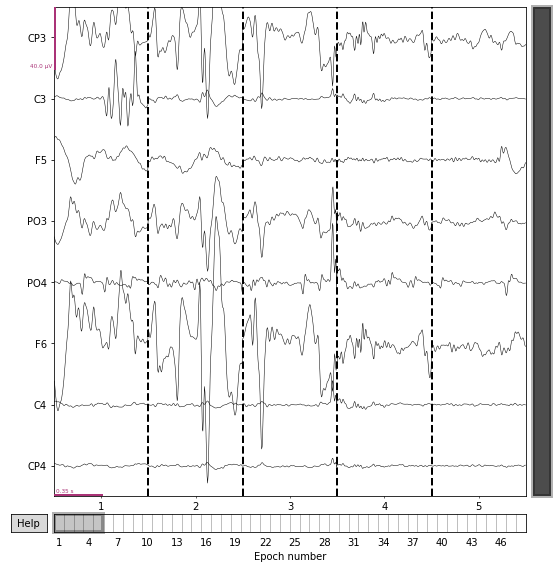

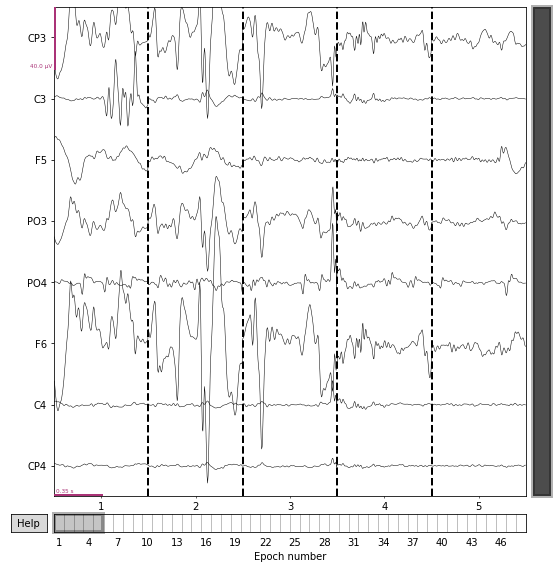

In [228]:
# visualizing the epochs & cleaning the data
epochs.plot(n_channels=8, n_epochs=5)

Using data from preloaded Raw for 48 events and 180 original time points ...


100%|██████████| Creating augmented epochs : 8/8 [00:00<00:00,  130.89it/s]
 12%|█▎        | Computing thresholds ... : 1/8 [00:00<00:00,   10.29it/s]

Running autoreject on ch_type=eeg


100%|██████████| Computing thresholds ... : 8/8 [00:00<00:00,    9.72it/s]


100%|██████████| Repairing epochs : 48/48 [00:00<00:00, 1583.05it/s]
















100%|██████████| Repairing epochs : 48/48 [00:00<00:00,  161.30it/s]












100%|██████████| Fold : 10/10 [00:00<00:00,   63.22it/s]

















100%|██████████| Repairing epochs : 48/48 [00:00<00:00,  152.08it/s]






100%|██████████| Fold : 10/10 [00:00<00:00,  218.19it/s]




/Users/oreogundipe/miniconda3/envs/fusion/lib/python3.8/site-packages/mne/bem.py:1134: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/oreogundipe/miniconda3/envs/fusion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/oreogundipe/miniconda3/envs/fusion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ore





Estimated consensus=0.60 and n_interpolate=4















100%|██████████| Repairing epochs : 48/48 [00:00<00:00,  112.72it/s]

Dropped 32 epochs: 7, 8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 44, 45, 46


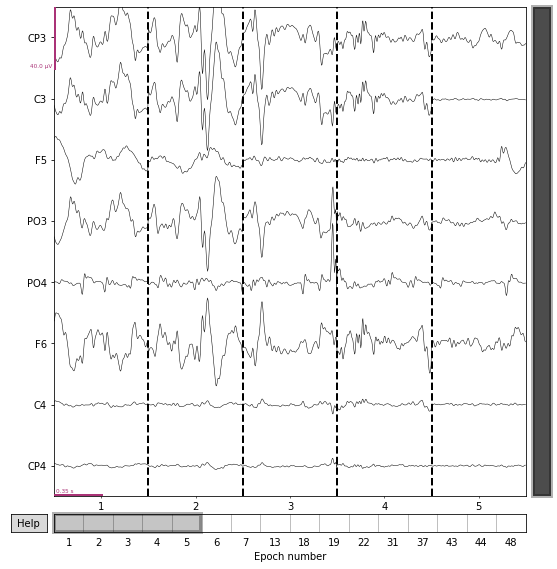

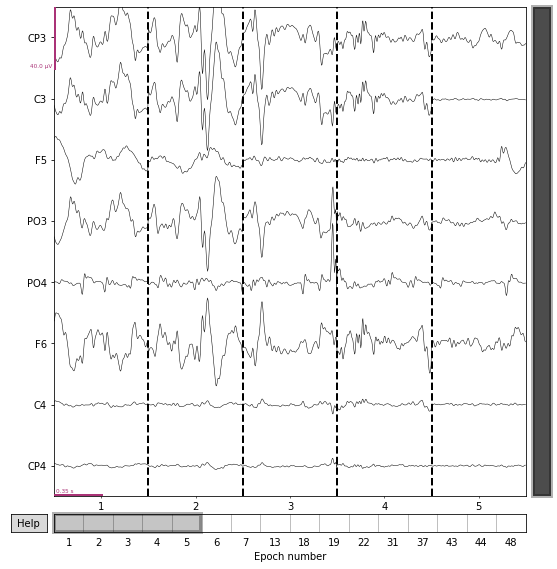

In [229]:
epochs.load_data()

from autoreject import AutoReject
ar = AutoReject()
epochs_clean = ar.fit_transform(epochs, return_log=False)

epochs_clean.plot(n_channels=8, n_epochs=5)

Move {'Nf3': 4}
    Using multitaper spectrum estimation with 7 DPSS windows


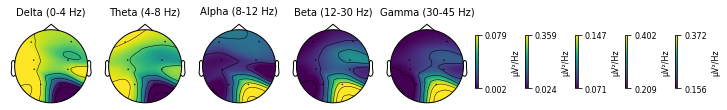

Move {'cxd5': 5}
    Using multitaper spectrum estimation with 7 DPSS windows


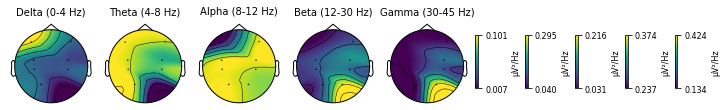

Move {'Qb3': 6}
    Using multitaper spectrum estimation with 7 DPSS windows


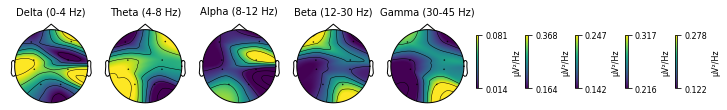

Move {'a3': 7}
    Using multitaper spectrum estimation with 7 DPSS windows


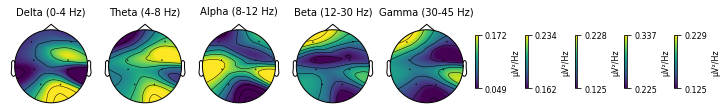

Move {'exf3': 8}
    Using multitaper spectrum estimation with 7 DPSS windows


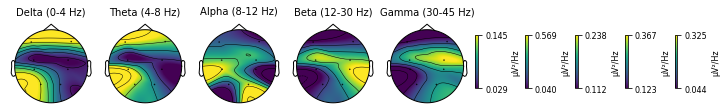

Move {'Qa4+': 9}
    Using multitaper spectrum estimation with 7 DPSS windows


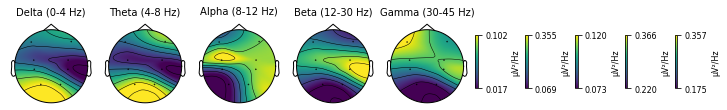

Move {'Qxd7+': 10}
    Using multitaper spectrum estimation with 7 DPSS windows


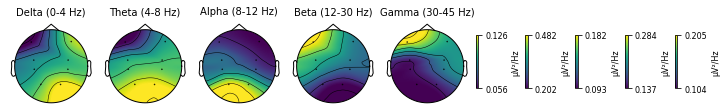

Move {'Rxa1': 16}
    Using multitaper spectrum estimation with 7 DPSS windows


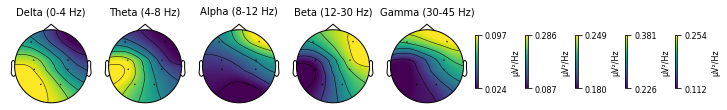

Move {'b3': 21}
    Using multitaper spectrum estimation with 7 DPSS windows


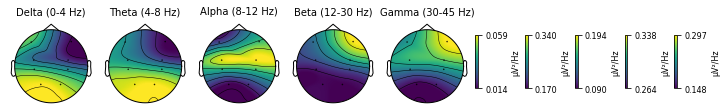

Move {'Nd6': 22}
    Using multitaper spectrum estimation with 7 DPSS windows


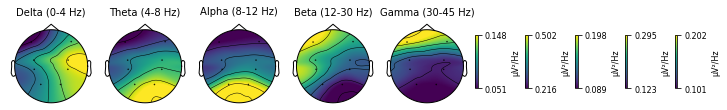

Move {'Re1': 25}
    Using multitaper spectrum estimation with 7 DPSS windows


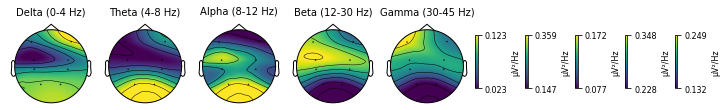

Move {'Kf3': 34}
    Using multitaper spectrum estimation with 7 DPSS windows


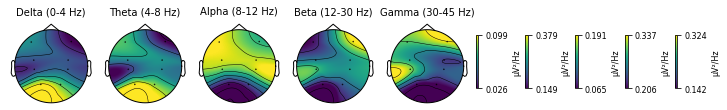

Move {'Kc6': 40}
    Using multitaper spectrum estimation with 7 DPSS windows


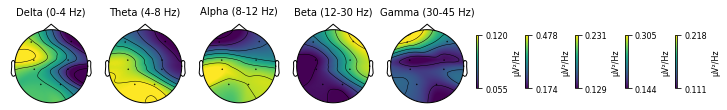

Move {'Kc7': 46}
    Using multitaper spectrum estimation with 7 DPSS windows


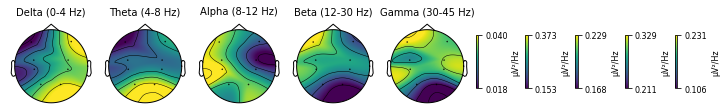

Move {'b7': 47}
    Using multitaper spectrum estimation with 7 DPSS windows


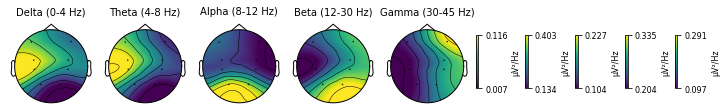

Move {'Kb7': 51}
    Using multitaper spectrum estimation with 7 DPSS windows


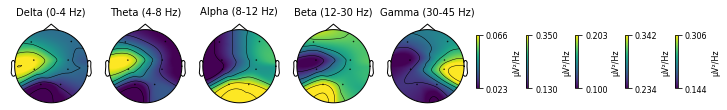

In [230]:
for i in range(len(epochs_clean)):
    print("Move", epochs_clean[i].event_id)
    epochs_clean[i].compute_psd().plot_topomap(normalize=True, cmap='viridis', show=True)